In [35]:
import math
import torch
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [29]:
def time_emb(time_steps: torch.Tensor, emb_dim: int, max_period: float=1e4) -> torch.Tensor:
    half = emb_dim // 2
    freqs = torch.exp(
        math.log(max_period) * torch.arange(start=0, end=half, dtype=torch.float32) / half
    ).to(device=time_steps.device)

    args = time_steps[:, None].float() * freqs[None]
    te = torch.zeros(time_steps.shape[0], emb_dim, device=time_steps.device)
    te[:, 0::2] = torch.cos(args)
    te[:, 1::2] = torch.sin(args)
    # te = torch.cat([torch.sin(args), torch.cos(args)], dim=-1)
    return te

In [36]:
def tick_formatter(x, pos):
    return x / 200

In [30]:
unnormalized_time = torch.arange(0, 200, dtype=torch.float32)
normalized_time = unnormalized_time / 200
unnormalized_time_emb1 = time_emb(unnormalized_time, emb_dim=512, max_period=1e4)
normalized_time_emb1 = time_emb(normalized_time, emb_dim=512, max_period=1e4)
unnormalized_time_emb2 = time_emb(unnormalized_time, emb_dim=512, max_period=1e3)
normalized_time_emb2 = time_emb(normalized_time, emb_dim=512, max_period=1e3)
unnormalized_time_emb3 = time_emb(unnormalized_time, emb_dim=512, max_period=1e2)
normalized_time_emb3 = time_emb(normalized_time, emb_dim=512, max_period=1e2)

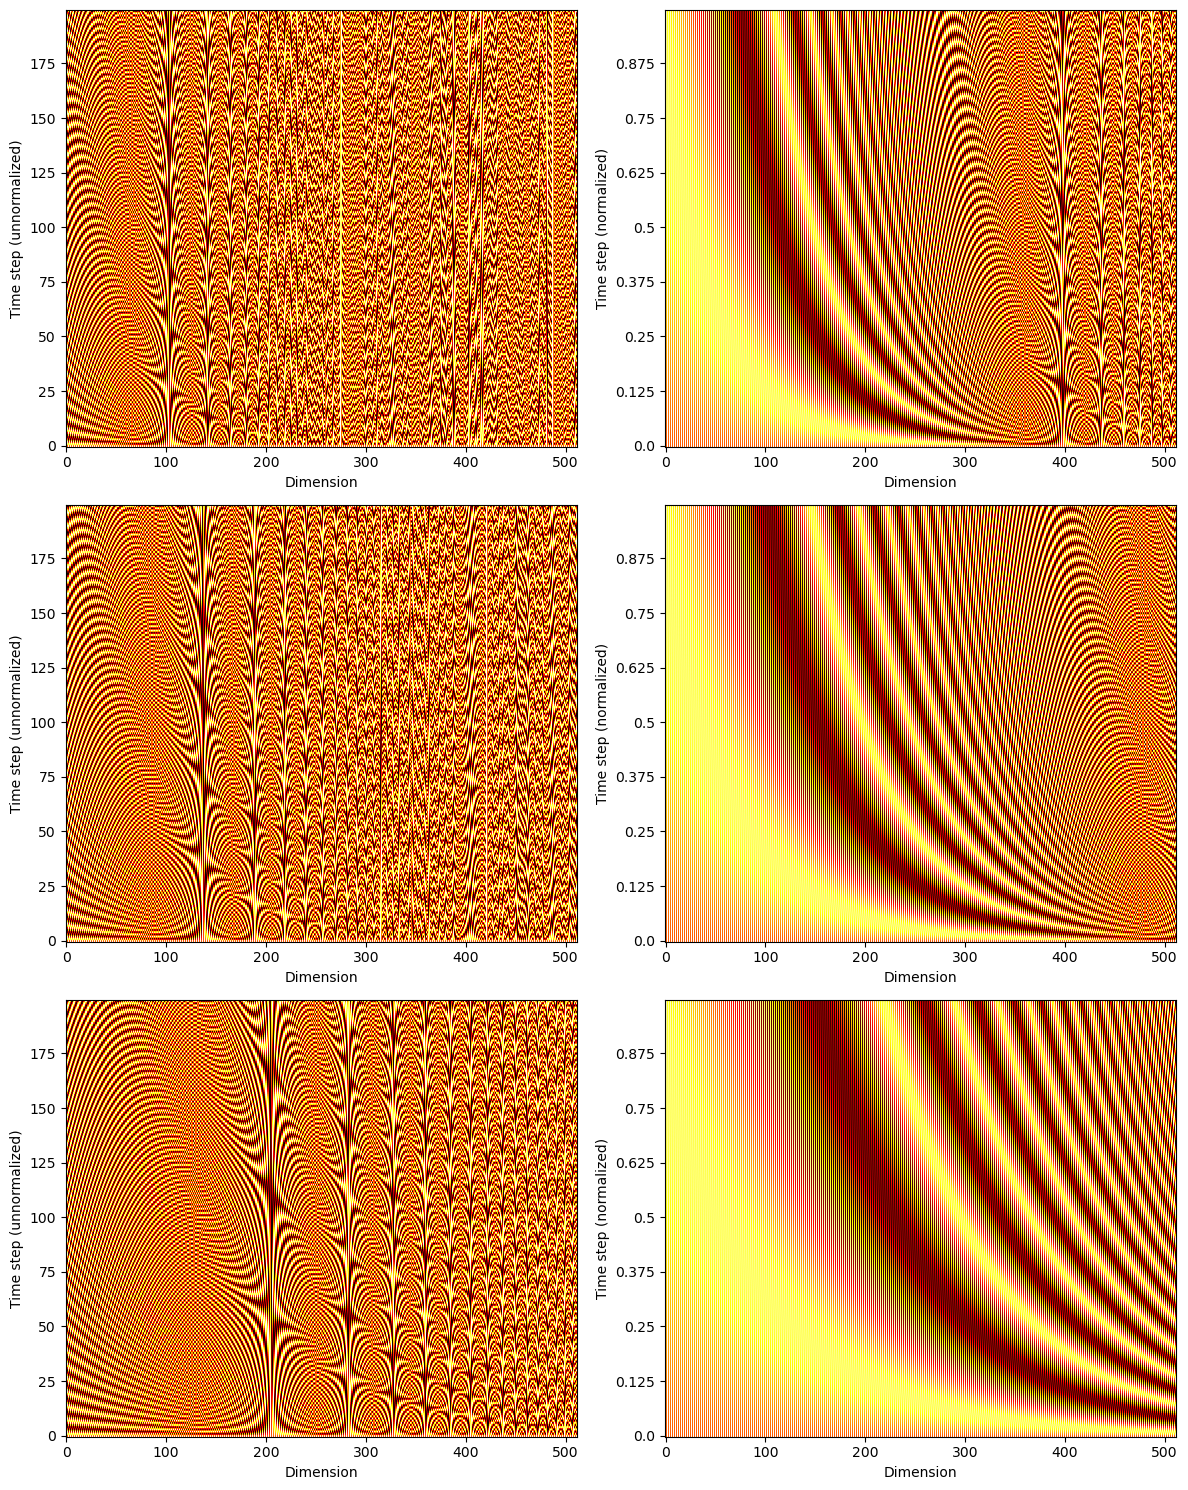

In [37]:
fig, ax = plt.subplots(3, 2, figsize=(12, 15))
ax[0, 0].imshow(unnormalized_time_emb1, aspect='auto', origin='lower', cmap='hot')
ax[0, 0].set_xlabel('Dimension')
ax[0, 0].set_ylabel('Time step (unnormalized)')
ax[0, 1].imshow(normalized_time_emb1, aspect='auto', origin='lower', cmap='hot')
ax[0, 1].set_xlabel('Dimension')
ax[0, 1].set_ylabel('Time step (normalized)')
ax[0, 1].yaxis.set_major_formatter(FuncFormatter(tick_formatter))
ax[1, 0].imshow(unnormalized_time_emb2, aspect='auto', origin='lower', cmap='hot')
ax[1, 0].set_xlabel('Dimension')
ax[1, 0].set_ylabel('Time step (unnormalized)')
ax[1, 1].imshow(normalized_time_emb2, aspect='auto', origin='lower', cmap='hot')
ax[1, 1].set_xlabel('Dimension')
ax[1, 1].set_ylabel('Time step (normalized)')
ax[1, 1].yaxis.set_major_formatter(FuncFormatter(tick_formatter))
ax[2, 0].imshow(unnormalized_time_emb3, aspect='auto', origin='lower', cmap='hot')
ax[2, 0].set_xlabel('Dimension')
ax[2, 0].set_ylabel('Time step (unnormalized)')
ax[2, 1].imshow(normalized_time_emb3, aspect='auto', origin='lower', cmap='hot')
ax[2, 1].set_xlabel('Dimension')
ax[2, 1].set_ylabel('Time step (normalized)')
ax[2, 1].yaxis.set_major_formatter(FuncFormatter(tick_formatter))
plt.tight_layout()
plt.show()
